# Pandas DataFrame Cheat Sheet

In [1]:
import pandas as pd
pd.set_option("display.precision", 4)
pd.set_option("display.max_rows", 15)

## Data Sources

In [2]:
pd.read_csv('~/GitHub/io/tests/test_csv/null.csv')
# sep='\t', header=None, names=['Col1', 'Col2'], na_values=['-']

,C1,C2,C3
0,1,2.0,3
1,4,NaN,6
2,7,8.0,9


In [3]:
# pd.read_json('test.json')
# conn = sqlite3.Connection('test.db'); pd.read_sql('SELECT * from table;', conn)

## Create

In [4]:
pd.DataFrame({'ColA': [1, 2, 3], 'ColB': [4, 5, 6], 'ColC': [7, 8, 9]})

,ColA,ColB,ColC
0,1,4,7
1,2,5,8
2,3,6,9


In [5]:
pd.DataFrame({'ColA': [1, 2, 3], 'ColB': [4, 5, 6], 'ColC': [7, 8, 9]},
             ['a', 'b',' c'])

,ColA,ColB,ColC
a,1,4,7
b,2,5,8
c,3,6,9


In [6]:
pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [7]:
ps1 = pd.Series([1, 2, 3])
ps2 = pd.Series([4, 5, 6])
pd.DataFrame({'ColA': ps1, 'ColB': ps2})

,ColA,ColB
0,1,4
1,2,5
2,3,6


In [8]:
ps1 = pd.Series([1, 2, 3], [1, 2, 3])
ps2 = pd.Series([1, 2, 3], [2, 1, 3])
pd.DataFrame({'ColA': ps1, 'ColB': ps2})
# NOTE: Series are re-ordered and matched by Indices!

,ColA,ColB
1,1,2
2,2,1
3,3,3


In [9]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                  index=['a', 'b',' c'],
                  columns=['ColA', 'ColB', 'ColC'])
df

,ColA,ColB,ColC
a,1,2,3
b,4,5,6
c,7,8,9


## Rename Column/Index

In [10]:
df.rename({'ColC': 'CCC'}, axis='columns')

,ColA,ColB,CCC
a,1,2,3
b,4,5,6
c,7,8,9


In [11]:
df.rename({'b': 'B'}, axis='index')

,ColA,ColB,ColC
a,1,2,3
B,4,5,6
c,7,8,9


## Assign/Reset Index

In [12]:
df.index = ['A', 'B', 'C']
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [13]:
df.reset_index()
# Resets index and create new 'index' column to store old indexes

,index,ColA,ColB,ColC
0,A,1,2,3
1,B,4,5,6
2,C,7,8,9


In [14]:
df.reset_index(drop=True)
# Dispense with creating 'index' column

,ColA,ColB,ColC
0,1,2,3
1,4,5,6
2,7,8,9


## Access Whole Column(s)

In [15]:
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [16]:
df['ColA']

A    1
B    4
C    7
Name: ColA, dtype: int64

In [17]:
df.ColA

A    1
B    4
C    7
Name: ColA, dtype: int64

In [18]:
df.iloc[:, 0]

A    1
B    4
C    7
Name: ColA, dtype: int64

In [19]:
df.loc[:, 'ColA':'ColB']

,ColA,ColB
A,1,2
B,4,5
C,7,8


In [20]:
df[['ColA', 'ColC']]

,ColA,ColC
A,1,3
B,4,6
C,7,9


## Access Whole Row(s)

In [21]:
df.iloc[0]

ColA    1
ColB    2
ColC    3
Name: A, dtype: int64

In [22]:
df.loc['A']

ColA    1
ColB    2
ColC    3
Name: A, dtype: int64

In [23]:
df.loc['A':'B']

,ColA,ColB,ColC
A,1,2,3
B,4,5,6


In [24]:
df[0:2]
# NOTE: Returns first two *ROWS* rather than *COLS*!

,ColA,ColB,ColC
A,1,2,3
B,4,5,6


In [25]:
df.loc[df['ColB'] > 4]

,ColA,ColB,ColC
B,4,5,6
C,7,8,9


## Access Single Cell

In [26]:
df.at['C', 'ColA']  # FASTEST
# df.loc['C', 'ColA']
# df.loc['C']['ColA']
# df['ColA']['C']

7

In [27]:
df.iat[2, 0]  # FASTEST
# df.iloc[2, 0]
# df.iloc[2][0]

7

In [28]:
df.at['C', 'ColA'] = 77
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,77,8,9


In [29]:
df.iat[2, 0] = 7
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


## Access Partial Column

In [30]:
df.loc['A':'B', 'ColA']  # FASTEST
# df['ColA']['A':'B']

A    1
B    4
Name: ColA, dtype: int64

In [31]:
df.iloc[0:2]['ColA']  # FASTEST
# df['ColA'][0:2]

A    1
B    4
Name: ColA, dtype: int64

In [32]:
df.iloc[0:2, 0]

A    1
B    4
Name: ColA, dtype: int64

In [33]:
df['ColA'][[0,2]]

A    1
C    7
Name: ColA, dtype: int64

## Access Partial Row

In [34]:
df.loc['A', 'ColA':'ColB']

ColA    1
ColB    2
Name: A, dtype: int64

In [35]:
df.iloc[0]['ColA':'ColB']

ColA    1
ColB    2
Name: A, dtype: int64

In [36]:
df.iloc[0, 0:2]
# df.iloc[0][0:2]

ColA    1
ColB    2
Name: A, dtype: int64

In [37]:
df.iloc[0][[0,2]]

ColA    1
ColC    3
Name: A, dtype: int64

## Access Partial Frame

In [38]:
df.iloc[1:, 1:]

,ColB,ColC
B,5,6
C,8,9


In [39]:
df.loc['B':'C', 'ColB':'ColC']

,ColB,ColC
B,5,6
C,8,9


## Dropping Rows / Columns

In [40]:
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [41]:
df.drop('A')

,ColA,ColB,ColC
B,4,5,6
C,7,8,9


In [42]:
df.drop('ColA', axis=1)

,ColB,ColC
A,2,3
B,5,6
C,8,9


In [43]:
df.drop(columns=['ColA', 'ColC'])
# df.drop(['ColA', 'ColC'], axis='columns')

,ColB
A,2
B,5
C,8


## Data Exploration

In [44]:
df.shape

(3, 3)

In [45]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
df.columns

Index(['ColA', 'ColB', 'ColC'], dtype='object')

In [47]:
df.columns.values.tolist()

['ColA', 'ColB', 'ColC']

In [48]:
df1 = df.copy()
df1.iat[0, 0] = np.NaN
df1.count()
# Count non-NA cells for each column or row

ColA    2
ColB    3
ColC    3
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ColA    3 non-null      int64
 1   ColB    3 non-null      int64
 2   ColC    3 non-null      int64
dtypes: int64(3)
memory usage: 204.0+ bytes


In [50]:
df.describe()

,ColA,ColB,ColC
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [51]:
df.agg(('min', 'max'))

,ColA,ColB,ColC
min,1,2,3
max,7,8,9


In [52]:
df1 = pd.DataFrame({'ColA': ['one', 'two', 'one']})
df1.describe()

,ColA
count,3
unique,2
top,one
freq,2


In [53]:
df['ColA'].value_counts()
# Returns Series containing Count of unique values with index set to values

1    1
4    1
7    1
Name: ColA, dtype: int64

In [54]:
vc = df[['ColA', 'ColC']].value_counts()
vc
# Returns Series containing Count of unique multi-col value combos with index
# set to the combos

ColA  ColC
1     3       1
4     6       1
7     9       1
dtype: int64

In [55]:
df.head(3)

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [56]:
df.tail(2)

,ColA,ColB,ColC
B,4,5,6
C,7,8,9


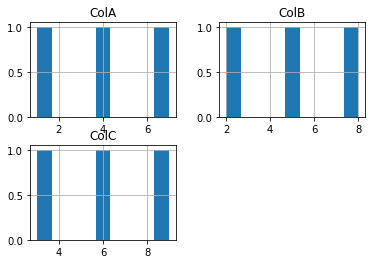

In [57]:
df.hist(bins=9);
# Histograms of all columns

## Data Visualization

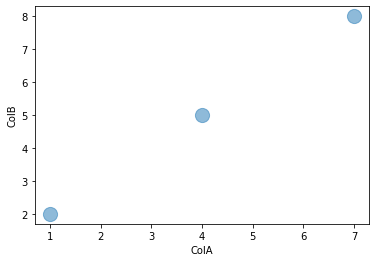

In [58]:
df.plot(kind='scatter', x='ColA', y='ColB', s=200, alpha=0.5);

In [59]:
df1 = df.applymap(lambda x: np.sin(x))
df1.corr()

,ColA,ColB,ColC
ColA,1.0000,0.9899,0.8751
ColB,0.9899,1.0000,0.9348
ColC,0.8751,0.9348,1.0000


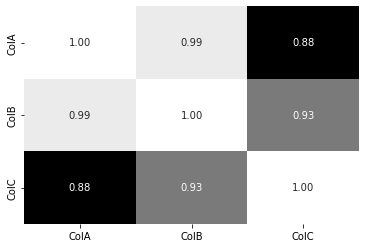

In [60]:
import seaborn as sns
sns.heatmap(abs(df1.corr()), annot=True, fmt=".2f", cmap='gray', cbar=False);

   ColA  ColB  ColC
A     1     2     3
B     4     5     6
C     7     8     9


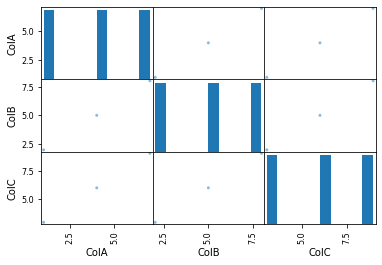

In [61]:
from pandas.plotting import scatter_matrix
print(df)
scatter_matrix(df);
# Matrix of scatter plots of all column-pairs
# Histograms plotted on diagonal

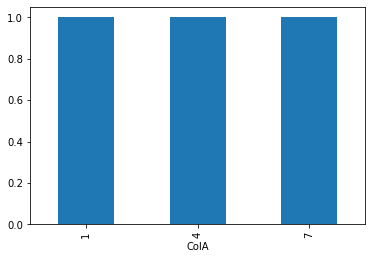

In [62]:
df.groupby('ColA').count().iloc[:, 0].plot(kind='bar');
# Chart of value counts of particular column

## Boolean Indexing

In [63]:
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [64]:
df['ColA'] > 2

A    False
B     True
C     True
Name: ColA, dtype: bool

In [65]:
df.loc[df['ColA'] > 2, 'ColA']
# df['ColA'][df['ColA'] > 2]

B    4
C    7
Name: ColA, dtype: int64

In [66]:
df > 4

,ColA,ColB,ColC
A,False,False,False
B,False,True,True
C,True,True,True


In [67]:
gt4 = df > 4
df[~gt4]

,ColA,ColB,ColC
A,1.0,2.0,3.0
B,4.0,NaN,NaN
C,NaN,NaN,NaN


In [68]:
df1 = df.copy()
df1[gt4] = -1
df1

,ColA,ColB,ColC
A,1,2,3
B,4,-1,-1
C,-1,-1,-1


In [69]:
df[(df['ColA'] > 1) & (df['ColA'] < 10)]

,ColA,ColB,ColC
B,4,5,6
C,7,8,9


In [70]:
df.loc[df['ColA'] > 1]

,ColA,ColB,ColC
B,4,5,6
C,7,8,9


## Sorting

In [71]:
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [72]:
df.sort_values('ColA', ascending=False, inplace=True)
df

,ColA,ColB,ColC
C,7,8,9
B,4,5,6
A,1,2,3


In [73]:
df.sort_index(inplace=True)
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [74]:
df.rank()
# Compute numerical data ranks (1 - n) along axis, where equal values by
# default are assigned a rank that is the average of ranks of those values

,ColA,ColB,ColC
A,1.0,1.0,1.0
B,2.0,2.0,2.0
C,3.0,3.0,3.0


## Computation

In [75]:
df

,ColA,ColB,ColC
A,1,2,3
B,4,5,6
C,7,8,9


In [76]:
df['ColA'].sum()

12

In [77]:
df['ColA'].min()

1

In [78]:
df['ColA'].max()

7

In [79]:
df['ColA'].mean()

4.000

In [80]:
df['ColA'].median()

4.000

In [81]:
df['ColA'].mode()
# Returns a Series as there may be multiple modes

0    1
1    4
2    7
Name: ColA, dtype: int64

In [82]:
df.cumsum(axis=1)
# Returns a same size DataFrame/Series containing the cumulative sum

,ColA,ColB,ColC
A,1,3,6
B,4,9,15
C,7,15,24


## Substitution

In [83]:
df['ColA'].map({1:'one', 4:'four'})
# Substituting each value in a Series with another value

A     one
B    four
C     NaN
Name: ColA, dtype: object

In [84]:
df['ColA'].apply(lambda x: x**2)
# Invoke function on values of Series

A     1
B    16
C    49
Name: ColA, dtype: int64

In [85]:
df.applymap(lambda x: x**2)
# Apply a function to a Dataframe elementwise

,ColA,ColB,ColC
A,1,4,9
B,16,25,36
C,49,64,81


In [86]:
df.apply(sum)
# Apply a function to a Col / Row(axis=1) Series

ColA    12
ColB    15
ColC    18
dtype: int64

## Grouping

In [87]:
df = pd.DataFrame({'ColA': ['X', 'Y', 'X'], 'ColB': [1, 2, 3], 'ColC': [4, 5, 6]})
df

,ColA,ColB,ColC
0,X,1,4
1,Y,2,5
2,X,3,6


In [88]:
df.groupby('ColA').sum()
# Group by unique values of given column(s), then apply an aggregation function
# to each group, column-by-column

,ColB,ColC
ColA,,
X,4,10
Y,2,5


In [89]:
df.groupby('ColA')['ColB'].sum()
# df.groupby('ColA').sum()['ColB']

ColA
X    4
Y    2
Name: ColB, dtype: int64

In [90]:
df.groupby('ColA').max()

,ColB,ColC
ColA,,
X,3,6
Y,2,5


In [91]:
df = pd.DataFrame({'ColA': ['X','X','Y','X'],
                   'ColB': ['Y','Y','Y','Z'],
                   'ColC': [1,2,3,4],
                   'ColD': [5,6,7,8]})
df

,ColA,ColB,ColC,ColD
0,X,Y,1,5
1,X,Y,2,6
2,Y,Y,3,7
3,X,Z,4,8


In [92]:
df.groupby(['ColA', 'ColB'])['ColC'].count()

ColA  ColB
X     Y       2
      Z       1
Y     Y       1
Name: ColC, dtype: int64